In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report, roc_curve

In [47]:
df_trained = pd.read_csv('val_trained_with_logits.csv')

In [48]:
df_untrained = pd.read_csv('val_untrained_with_logits.csv')

In [49]:
def eval_model(all_labels, all_preds, all_probs, label_name="Label"):
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary', zero_division=0)
    roc_auc = roc_auc_score(all_labels, all_probs)
    class_report = classification_report(all_labels, all_preds, zero_division=0)
    print(f"{label_name} - Accuracy: {accuracy:.4f}")
    print(f"{label_name} - Precision: {precision:.4f}")
    print(f"{label_name} - Recall: {recall:.4f}")
    print(f"{label_name} - F1-Score: {f1:.4f}")
    print(f"{label_name} - ROC-AUC Score: {roc_auc:.4f}")
    print(f"\n{label_name} - Classification Report:\n{class_report}")
    fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'{label_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(False)
    plt.show()

Llama untrained - Accuracy: 0.7966
Llama untrained - Precision: 0.1562
Llama untrained - Recall: 0.2261
Llama untrained - F1-Score: 0.1847
Llama untrained - ROC-AUC Score: 0.6227

Llama untrained - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2027
           1       0.16      0.23      0.18       230

    accuracy                           0.80      2257
   macro avg       0.53      0.54      0.53      2257
weighted avg       0.83      0.80      0.81      2257



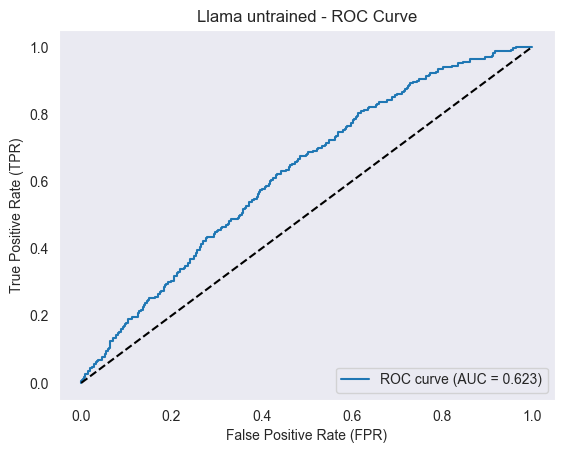

In [50]:
eval_model(df_untrained['polarizing'], df_untrained['predicted_label'], df_untrained['positive_score'], "Llama untrained")

Llama trained - Accuracy: 0.8821
Llama trained - Precision: 0.4593
Llama trained - Recall: 0.8826
Llama trained - F1-Score: 0.6042
Llama trained - ROC-AUC Score: 0.9573

Llama trained - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2027
           1       0.46      0.88      0.60       230

    accuracy                           0.88      2257
   macro avg       0.72      0.88      0.77      2257
weighted avg       0.93      0.88      0.90      2257



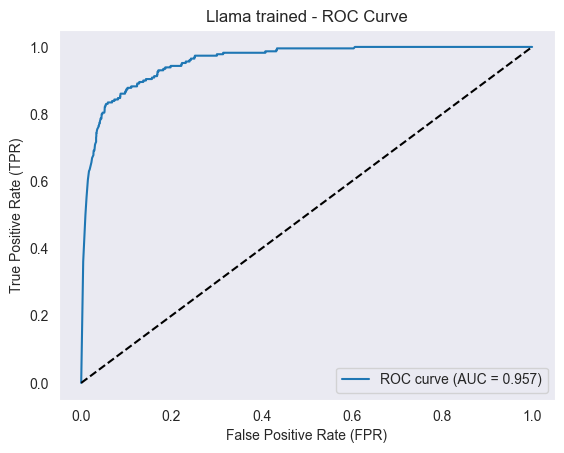

In [51]:
eval_model(df_trained['polarizing'], df_trained['predicted_label'], df_trained['positive_score'], "Llama trained")